# Task 4: Introduction to Deep Learning with TensorFlow & Keras

## Section 1: Setup & Dataset

### **Task 1**: Import Dependencies and Load Data
*Instruction*: Use the MNIST dataset (handwritten digit classification). Load it from tf.keras.datasets and normalize the pixel values.

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

# Load and normalize
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train / 255.0
X_test = X_test / 255.0

## Section 2: Data Exploration

### **Task 2**: Visualize Sample Images

*Instruction*: Plot the first 10 images with their corresponding labels.


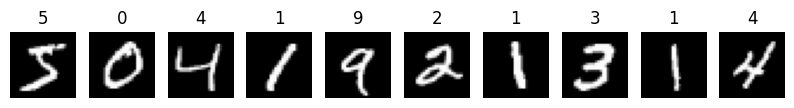

In [ ]:
plt.figure(figsize=(10, 2))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(X_train[i], cmap="gray")
    plt.title(y_train[i])
    plt.axis('off')
plt.show()

## Section 3: Build a Neural Network

### **Task 3**: Define a Simple MLP Model

*Instruction*: Use Keras to create a simple feedforward neural network with:


*   Input layer (flatten)
*   2 hidden layers (128, 64 neurons) with ReLU
*   Output layer with softmax


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


## Section 4: Compile & Train

### **Task 4**: Compile and Fit the Model

*Instruction*: Compile using `adam` optimizer and `sparse_categorical_crossentropy` as loss function. Train for 10 epochs.

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=10, validation_split=0.1)

Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8718 - loss: 0.4440 - val_accuracy: 0.9717 - val_loss: 0.1016
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9652 - loss: 0.1095 - val_accuracy: 0.9735 - val_loss: 0.0815
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9784 - loss: 0.0715 - val_accuracy: 0.9743 - val_loss: 0.0859
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9842 - loss: 0.0515 - val_accuracy: 0.9795 - val_loss: 0.0743
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9881 - loss: 0.0412 - val_accuracy: 0.9788 - val_loss: 0.0790
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9904 - loss: 0.0308 - val_accuracy: 0.9797 - val_loss: 0.0802
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9910 - loss: 0.0269 - val_accuracy: 0.9773 - val_loss: 0.0891
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 13s 5ms/step - accuracy: 0.9927 - loss: 0.0213 

## Section 5: Evaluate the Model

### **Task 5**:  Test Accuracy and Confusion Matrix

*Instruction*: Evaluate the model on the test set and print confusion matrix.


In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report

test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc:.2f}")

y_pred = np.argmax(model.predict(X_test), axis=1)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9711 - loss: 0.1172
Test Accuracy: 0.97
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
[[ 959    0    0    0    3    3    8    1    4    2]
 [   0 1127    1    3    1    0    1    0    2    0]
 [   3    2  993   14    4    0    1    6    8    1]
 [   0    0    3  991    0    7    0    3    2    4]
 [   0    0    0    1  972    0    1    0    0    8]
 [   3    0    0    7    2  864    9    1    4    2]
 [   2    3    0    1    9    2  939    0    2    0]
 [   0    4   10   12    4    0    0  986    3    9]
 [   2    1    1    9    7    5    1    3  942    3]
 [   0    2    1    4   13    6    1    5    1  976]]
              precision    recall  f1-score   support

           0       0.99      0.98      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.96      0.97      1032
           3       0.95      0.98      0.97      1010
           4       0.96      0.99      0.97       982
        

## Section 6: Plot Training History

### **Task 6**: Visualize Accuracy and Loss

*Instruction*: Plot training vs validation accuracy and loss over epochs.

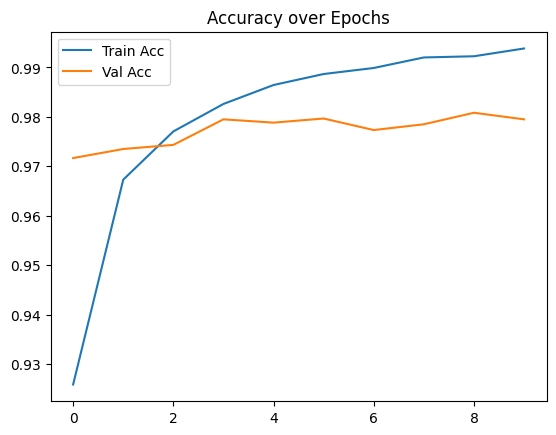

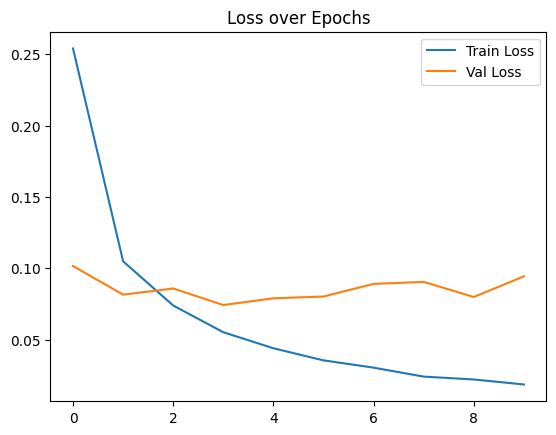

In [ ]:
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.legend()
plt.title('Accuracy over Epochs')
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.title('Loss over Epochs')
plt.show()